# Decision Tree Classifier with Employee Attrition Dataset

In this notebook, we will build a decision tree classifier using the scikit-learn library. We will use a hypothetical employee attrition dataset for this example.

## Import Libraries
First, let's import the necessary libraries.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

## Load and Explore the Dataset
Next, we will load the employee attrition dataset ('employee_attrition_small.csv') and explore its contents.

In [47]:
# Load the dataset
df = pd.read_csv('employee_attrition_small.csv')

## Preprocess the Data
We need to preprocess the data, including handling categorical variables and missing values.

In [48]:
# Check for missing values
print(df.isnull().sum())

# Perform encoding for binary variables on the full dataframe
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})

# Encode ordinal/nominal variables using LabelEncoder
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Department'] = le.fit_transform(df['Department'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['JobRole'] = le.fit_transform(df['JobRole'])


Age                   0
Attrition             0
BusinessTravel        0
DailyRate             0
Department            0
EducationField        0
Gender                0
HourlyRate            0
JobRole               0
JobSatisfaction       0
MaritalStatus         0
MonthlyIncome         0
MonthlyRate           0
NumCompaniesWorked    0
OverTime              0
TotalWorkingYears     0
dtype: int64


## Split the Dataset
We will split the dataset into training and testing sets.

In [49]:
# drop the outcome column
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evaluate the Decision Tree Model
## Please not that the maximum depth shouldn't be greater than 3

In [50]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10,random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 0.87


Visualise

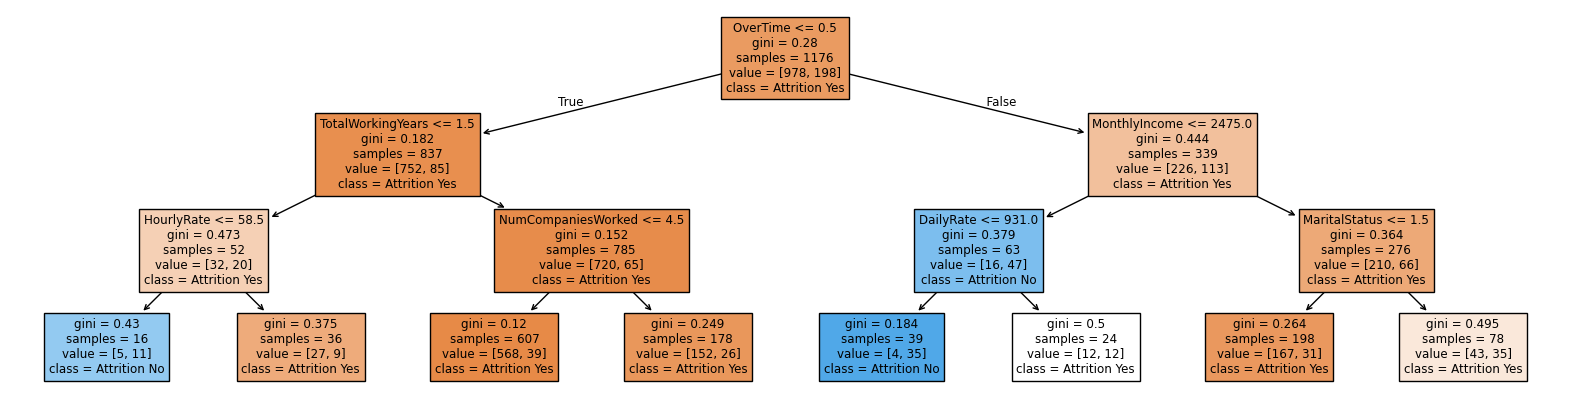

In [51]:
# Plot the decision tree
plt.figure(figsize=(20,5))
custom_class_names = ['Attrition Yes','Attrition No']
plot_tree(dt_classifier, feature_names=X.columns, class_names=custom_class_names, filled=True)
plt.show()